# Data Type Conversion
Data type conversion starts when you first import data and continues on with the data wrangling process. When adding categorical variables and your own derived columns, this becomes an ongoing iterative process. 

In this exercise, we will clean up the automotive data from UCI, exposing you to some new key functions such as mutate(), and as.factor(). We will walk through the process step-by-step looking at the data and determining what data is important and how it should be transformed. The end results in a data analysis of the newly cleaned data showing the relationship between diesel and gas engines and their highway gas mileage performance.



## R Features
* library()
* read_csv()
* glimpse()
* summary()
* mutate()
* as.factor()
* fct_drop()
* drop_na()
* as.integer()
* ggplot()
* geom_jitter()
* geom_smooth()
* filter()
* facet_grid()

## Datasets
* automotive from UCI


# L03-5-Data Type Conversion
## Assignment Instructions
Rename with your name in place of Studentname and make your edits and updates here.


In [18]:
# Load libraries
library('forcats') # forcats
library('tidyverse') # tidyverse

## UCI Automobile Data Set

Manually explore UCI and a description of the data in your web browser. 

https://archive.ics.uci.edu/ml/datasets/Automobile

Did you notice where the column names were stored? 

In [19]:
# Load the UCI auto data
# store auto.csv in df_auto
df_auto <- read_csv("auto.csv")

Parsed with column specification:
cols(
  .default = col_character(),
  symboling = col_integer(),
  wheel_base = col_double(),
  length = col_double(),
  width = col_double(),
  height = col_double(),
  curb_weight = col_integer(),
  engine_size = col_integer(),
  compression_ratio = col_double(),
  city_mpg = col_integer(),
  highway_mpg = col_integer()
)
See spec(...) for full column specifications.


In [20]:
# Glimpse data frame
glimpse(df_auto)

Observations: 205
Variables: 26
$ symboling         <int> 3, 3, 1, 2, 2, 2, 1, 1, 1, 0, 2, 0, 0, 0, 1, 0, 0, …
$ normalized_losses <chr> "?", "?", "?", "164", "164", "?", "158", "?", "158"…
$ make              <chr> "alfa-romero", "alfa-romero", "alfa-romero", "audi"…
$ fuel_type         <chr> "gas", "gas", "gas", "gas", "gas", "gas", "gas", "g…
$ aspiration        <chr> "std", "std", "std", "std", "std", "std", "std", "s…
$ num_of_doors      <chr> "two", "two", "two", "four", "four", "two", "four",…
$ body_style        <chr> "convertible", "convertible", "hatchback", "sedan",…
$ drive_wheels      <chr> "rwd", "rwd", "rwd", "fwd", "4wd", "fwd", "fwd", "f…
$ engine_location   <chr> "front", "front", "front", "front", "front", "front…
$ wheel_base        <dbl> 88.6, 88.6, 94.5, 99.8, 99.4, 99.8, 105.8, 105.8, 1…
$ length            <dbl> 168.8, 168.8, 171.2, 176.6, 176.6, 177.3, 192.7, 19…
$ width             <dbl> 64.1, 64.1, 65.5, 66.2, 66.4, 66.3, 71.4, 71.4, 71.…
$ height            

Look at the above information carefully. This is where you can start to determine the following:
•	Which columns you are interested in and which you can ignore
•	For the columns of interest, what are the most appropriate data types
•	For columns that we want to change the data type, is there any data cleaning needed first
•	Determine how many missing values and how to best handle them



## select()
I am interested in analyzing fuel economy in conjunction with vehicle and engine size. Columns that come to mind are:
* fuel_type
* drive_wheels
* curb_weight
* engine_type
* num_of_cylinders
* engine_size
* fuel_system
* horsepower
* city_mpg
* highway_mpg

In [21]:
# Create a new df with
# just the columns of interest above
# Use select()
df <- df_auto %>% 
   select(fuel_type, drive_wheels, 
          curb_weight, engine_type, 
          num_of_cylinders, engine_size, 
          fuel_system, horsepower, 
          city_mpg, highway_mpg)

# Glimpse result
glimpse(df)

Observations: 205
Variables: 10
$ fuel_type        <chr> "gas", "gas", "gas", "gas", "gas", "gas", "gas", "ga…
$ drive_wheels     <chr> "rwd", "rwd", "rwd", "fwd", "4wd", "fwd", "fwd", "fw…
$ curb_weight      <int> 2548, 2548, 2823, 2337, 2824, 2507, 2844, 2954, 3086…
$ engine_type      <chr> "dohc", "dohc", "ohcv", "ohc", "ohc", "ohc", "ohc", …
$ num_of_cylinders <chr> "four", "four", "six", "four", "five", "five", "five…
$ engine_size      <int> 130, 130, 152, 109, 136, 136, 136, 136, 131, 131, 10…
$ fuel_system      <chr> "mpfi", "mpfi", "mpfi", "mpfi", "mpfi", "mpfi", "mpf…
$ horsepower       <chr> "111", "111", "154", "102", "115", "110", "110", "11…
$ city_mpg         <int> 21, 21, 19, 24, 18, 19, 19, 19, 17, 16, 23, 23, 21, …
$ highway_mpg      <int> 27, 27, 26, 30, 22, 25, 25, 25, 20, 22, 29, 29, 28, …


## summary()
Another useful function similar to glimpse is summary(). It gives some statistics and an idea of missing values. These concepts will be covered in the stats lessons in the course. Here we will just take a peek.

In [22]:
# Run summary() on df
summary(df)

  fuel_type         drive_wheels        curb_weight   engine_type       
 Length:205         Length:205         Min.   :1488   Length:205        
 Class :character   Class :character   1st Qu.:2145   Class :character  
 Mode  :character   Mode  :character   Median :2414   Mode  :character  
                                       Mean   :2556                     
                                       3rd Qu.:2935                     
                                       Max.   :4066                     
 num_of_cylinders    engine_size    fuel_system         horsepower       
 Length:205         Min.   : 61.0   Length:205         Length:205        
 Class :character   1st Qu.: 97.0   Class :character   Class :character  
 Mode  :character   Median :120.0   Mode  :character   Mode  :character  
                    Mean   :126.9                                        
                    3rd Qu.:141.0                                        
                    Max.   :326.0            

There is a lot of information in summary(). When in the context of data cleaning and data type conversion, I am looking for missing values or unexpected min or max outliers. I don't see much here. The work we have to do is on the character columns and unfortunately summary() doesn't provide much insight. 

There are two columns that I want to look into further, num_of_cylinders and horsepower. Both of these are character data type and have the potential for an integer data type.

## as.factor()
Factors are just a way for R to normalize character strings by referencing them by number. 

I like to temporarility convert strings to factors just to see what is in there. Often there are some outliers that may need to be removed before we can convert the string to a number. 

If we combine as.factor() with summary() we can see more.



In [23]:
# Use $ to select num of cylinders column of df
# then pipe it to as.factor() 
# then pipe to summary()
df$num_of_cylinders%>%as.factor() %>% summary()

eight   five   four    six  three twelve    two 
     5     11    159     24      1      1      4

Now we can see all of the different values of number of cylinders and how many rows each contain. Since I am interested in analyzing the general trend of fuel economy, I would like to stick to the more popular cylinder counts. I don't want any outliers to confuse my analysiss. 

From the data it looks like I should keep 4 and 6 cylinder engines. Let's filter the data for this.

In [24]:
#?filter

In [25]:
# Filter df so it contains 
# only 4 and 6 cylinder vehicles
# store back in df
df <- df %>% 
   filter(num_of_cylinders %in% c("four", "six"))

# Glimpse result
glimpse(df)

Observations: 183
Variables: 10
$ fuel_type        <chr> "gas", "gas", "gas", "gas", "gas", "gas", "gas", "ga…
$ drive_wheels     <chr> "rwd", "rwd", "rwd", "fwd", "rwd", "rwd", "rwd", "rw…
$ curb_weight      <int> 2548, 2548, 2823, 2337, 2395, 2395, 2710, 2765, 3055…
$ engine_type      <chr> "dohc", "dohc", "ohcv", "ohc", "ohc", "ohc", "ohc", …
$ num_of_cylinders <chr> "four", "four", "six", "four", "four", "four", "six"…
$ engine_size      <int> 130, 130, 152, 109, 108, 108, 164, 164, 164, 209, 20…
$ fuel_system      <chr> "mpfi", "mpfi", "mpfi", "mpfi", "mpfi", "mpfi", "mpf…
$ horsepower       <chr> "111", "111", "154", "102", "101", "101", "121", "12…
$ city_mpg         <int> 21, 21, 19, 24, 23, 23, 21, 21, 20, 16, 16, 15, 38, …
$ highway_mpg      <int> 27, 27, 26, 30, 29, 29, 28, 28, 25, 22, 22, 20, 43, …


Let's rerun the last as.factor() + summary() code and confirm that only 4 and 6 cylinder vehicles remain. Don't be fooled by glimpse(). It is only showing the first set of rows of data.

In [26]:
# Use $ to select num of cylinders column of df
# then pipe it to as.factor() 
# then pipe to summary()
df$num_of_cylinders %>% as.factor() %>% summary()

four  six 
 159   24

## mutate()

That looks good. Now back to the question of data type conversion. We could convert the string "four" and "six" to numbers and we could do that. However, I know that this is going to be used as a categorical variable not and not as a variable that we would perform mathematical operations against. So, leaving it as strings won't hurt anything. 

In either case, we want to convert this column to a factor. This is where mutate() comes in. mutate() is a tidyverse dplyr function that can update existing columns or create new columns in a data frame.


In [27]:
?levels()

In [28]:
?gl

In [29]:
# Convert cylinders to a factor
df <- df %>% 
   mutate(num_of_cylinders = as.factor(num_of_cylinders))

# View factor levels with levels()
levels(df$num_of_cylinders)

# Glimpse result
glimpse(df)

[1] "four" "six"

Observations: 183
Variables: 10
$ fuel_type        <chr> "gas", "gas", "gas", "gas", "gas", "gas", "gas", "ga…
$ drive_wheels     <chr> "rwd", "rwd", "rwd", "fwd", "rwd", "rwd", "rwd", "rw…
$ curb_weight      <int> 2548, 2548, 2823, 2337, 2395, 2395, 2710, 2765, 3055…
$ engine_type      <chr> "dohc", "dohc", "ohcv", "ohc", "ohc", "ohc", "ohc", …
$ num_of_cylinders <fct> four, four, six, four, four, four, six, six, six, si…
$ engine_size      <int> 130, 130, 152, 109, 108, 108, 164, 164, 164, 209, 20…
$ fuel_system      <chr> "mpfi", "mpfi", "mpfi", "mpfi", "mpfi", "mpfi", "mpf…
$ horsepower       <chr> "111", "111", "154", "102", "101", "101", "121", "12…
$ city_mpg         <int> 21, 21, 19, 24, 23, 23, 21, 21, 20, 16, 16, 15, 38, …
$ highway_mpg      <int> 27, 27, 26, 30, 29, 29, 28, 28, 25, 22, 22, 20, 43, …


Notice above that num_of_cylinders data type changed from <chr> to <fctr> and the values are not quoted.

Let's convert the following to factors:
* fuel_type
* drive_wheels
* engine_type
* fuel_system



In [30]:
# Convert strings to factors
df <- df %>% 
   mutate(fuel_type = as.factor(fuel_type),
         drive_wheels = as.factor(drive_wheels),
         engine_type = as.factor(engine_type),
         fuel_system = as.factor(fuel_system))

# Glimpse result
df%>%glimpse()

# Summary result
df%>%summary()

Observations: 183
Variables: 10
$ fuel_type        <fct> gas, gas, gas, gas, gas, gas, gas, gas, gas, gas, ga…
$ drive_wheels     <fct> rwd, rwd, rwd, fwd, rwd, rwd, rwd, rwd, rwd, rwd, rw…
$ curb_weight      <int> 2548, 2548, 2823, 2337, 2395, 2395, 2710, 2765, 3055…
$ engine_type      <fct> dohc, dohc, ohcv, ohc, ohc, ohc, ohc, ohc, ohc, ohc,…
$ num_of_cylinders <fct> four, four, six, four, four, four, six, six, six, si…
$ engine_size      <int> 130, 130, 152, 109, 108, 108, 164, 164, 164, 209, 20…
$ fuel_system      <fct> mpfi, mpfi, mpfi, mpfi, mpfi, mpfi, mpfi, mpfi, mpfi…
$ horsepower       <chr> "111", "111", "154", "102", "101", "101", "121", "12…
$ city_mpg         <int> 21, 21, 19, 24, 23, 23, 21, 21, 20, 16, 16, 15, 38, …
$ highway_mpg      <int> 27, 27, 26, 30, 29, 29, 28, 28, 25, 22, 22, 20, 43, …


  fuel_type   drive_wheels  curb_weight   engine_type num_of_cylinders
 diesel: 16   4wd:  7      Min.   :1713   dohc: 12    four:159        
 gas   :167   fwd:114      1st Qu.:2125   l   : 11    six : 24        
              rwd: 62      Median :2395   ohc :137                    
                           Mean   :2491   ohcf: 15                    
                           3rd Qu.:2820   ohcv:  8                    
                           Max.   :4066                               
                                                                      
  engine_size    fuel_system  horsepower           city_mpg      highway_mpg  
 Min.   : 79.0   1bbl:11     Length:183         Min.   :15.00   Min.   :19.0  
 1st Qu.: 97.0   2bbl:65     Class :character   1st Qu.:21.00   1st Qu.:27.0  
 Median :110.0   idi :16     Mode  :character   Median :26.00   Median :31.0  
 Mean   :122.3   mfi : 1                        Mean   :25.96   Mean   :31.6  
 3rd Qu.:141.0   mpfi:80             

It is looking much better. Notice all of our data types are either factor or integer, with the exception of horsepower, which we will tackle next. 

Also notice how much more informative the summary() function is for factors as compared to characters. I can see for example that there are only 7 4wd, much lower than the rest. 

Let's filter out 4wd before we tackle horsepower.

In [31]:
df <- df %>% 
   filter(drive_wheels != "4wd")

# Glimpse result
df %>% glimpse()

# Summary result
df %>% summary()

Observations: 176
Variables: 10
$ fuel_type        <fct> gas, gas, gas, gas, gas, gas, gas, gas, gas, gas, ga…
$ drive_wheels     <fct> rwd, rwd, rwd, fwd, rwd, rwd, rwd, rwd, rwd, rwd, rw…
$ curb_weight      <int> 2548, 2548, 2823, 2337, 2395, 2395, 2710, 2765, 3055…
$ engine_type      <fct> dohc, dohc, ohcv, ohc, ohc, ohc, ohc, ohc, ohc, ohc,…
$ num_of_cylinders <fct> four, four, six, four, four, four, six, six, six, si…
$ engine_size      <int> 130, 130, 152, 109, 108, 108, 164, 164, 164, 209, 20…
$ fuel_system      <fct> mpfi, mpfi, mpfi, mpfi, mpfi, mpfi, mpfi, mpfi, mpfi…
$ horsepower       <chr> "111", "111", "154", "102", "101", "101", "121", "12…
$ city_mpg         <int> 21, 21, 19, 24, 23, 23, 21, 21, 20, 16, 16, 15, 38, …
$ highway_mpg      <int> 27, 27, 26, 30, 29, 29, 28, 28, 25, 22, 22, 20, 43, …


  fuel_type   drive_wheels  curb_weight   engine_type num_of_cylinders
 diesel: 16   4wd:  0      Min.   :1713   dohc: 12    four:152        
 gas   :160   fwd:114      1st Qu.:2117   l   : 11    six : 24        
              rwd: 62      Median :2395   ohc :135                    
                           Mean   :2491   ohcf: 10                    
                           3rd Qu.:2826   ohcv:  8                    
                           Max.   :4066                               
                                                                      
  engine_size    fuel_system  horsepower           city_mpg      highway_mpg   
 Min.   : 79.0   1bbl:11     Length:176         Min.   :15.00   Min.   :19.00  
 1st Qu.: 97.0   2bbl:60     Class :character   1st Qu.:21.00   1st Qu.:27.00  
 Median :110.5   idi :16     Mode  :character   Median :26.00   Median :31.00  
 Mean   :123.1   mfi : 1                        Mean   :26.01   Mean   :31.72  
 3rd Qu.:141.0   mpfi:78        

Notice the number of observations decreased from 183 to 176. Also notice that under drive wheels summary, 4wd is 0. This is a situation where I would like to drop that level otherwise it will always show 0.

In [33]:
# Drop drive_wheels unused levels
# using fct_drop
df <- df %>% 
   mutate(drive_wheels = fct_drop(drive_wheels))

# Glimpse result
df %>% glimpse()

# Summary result
df %>% summary()

Observations: 176
Variables: 10
$ fuel_type        <fct> gas, gas, gas, gas, gas, gas, gas, gas, gas, gas, ga…
$ drive_wheels     <fct> rwd, rwd, rwd, fwd, rwd, rwd, rwd, rwd, rwd, rwd, rw…
$ curb_weight      <int> 2548, 2548, 2823, 2337, 2395, 2395, 2710, 2765, 3055…
$ engine_type      <fct> dohc, dohc, ohcv, ohc, ohc, ohc, ohc, ohc, ohc, ohc,…
$ num_of_cylinders <fct> four, four, six, four, four, four, six, six, six, si…
$ engine_size      <int> 130, 130, 152, 109, 108, 108, 164, 164, 164, 209, 20…
$ fuel_system      <fct> mpfi, mpfi, mpfi, mpfi, mpfi, mpfi, mpfi, mpfi, mpfi…
$ horsepower       <chr> "111", "111", "154", "102", "101", "101", "121", "12…
$ city_mpg         <int> 21, 21, 19, 24, 23, 23, 21, 21, 20, 16, 16, 15, 38, …
$ highway_mpg      <int> 27, 27, 26, 30, 29, 29, 28, 28, 25, 22, 22, 20, 43, …


  fuel_type   drive_wheels  curb_weight   engine_type num_of_cylinders
 diesel: 16   fwd:114      Min.   :1713   dohc: 12    four:152        
 gas   :160   rwd: 62      1st Qu.:2117   l   : 11    six : 24        
                           Median :2395   ohc :135                    
                           Mean   :2491   ohcf: 10                    
                           3rd Qu.:2826   ohcv:  8                    
                           Max.   :4066                               
                                                                      
  engine_size    fuel_system  horsepower           city_mpg      highway_mpg   
 Min.   : 79.0   1bbl:11     Length:176         Min.   :15.00   Min.   :19.00  
 1st Qu.: 97.0   2bbl:60     Class :character   1st Qu.:21.00   1st Qu.:27.00  
 Median :110.5   idi :16     Mode  :character   Median :26.00   Median :31.00  
 Mean   :123.1   mfi : 1                        Mean   :26.01   Mean   :31.72  
 3rd Qu.:141.0   mpfi:78        

Great. drive_wheels looks good. 4wd is gone. Let's explore horsepower. Recall from earlier how we piped the column to as.factor() then onto summary(). Let's do that with horsepower.

In [34]:
# Summary of factorized horsepower
df$horsepower%>%as.factor() %>% summary()

? 100 101 102 106 110 111 112 114 116 120 121 134 142 143 145 152 154 156 160 
  2   2   3   5   1   4   2   2   6   9   1   3   1   1   1   5   3   1   2   5 
161 162 175 176 182 200 207  52  55  56  58  60  62  64  68  69  70  72  73  76 
  2   2   1   2   3   1   3   2   1   2   1   1   4   1  19  10  11   1   2   5 
 78  82  84  85  86  88  90  92  94  95  97 
  1   3   5   3   4   6   3   4   2   7   5

Notice the reason why it couldn't be converted to a number? It is the 2 rows with a question mark. I am tempted to just filter out those rows, but for learning purposes, let's see what happens when we leave them in and convert to an integer data type.

In these exercises we are overwriting the columns and the data frame with updated data. In practice, there is a balance with traceability back to the source and information loss. For example, you could store snapshots of the data frame in distinct variables at each stage in the pipeline. You could also have multiple copies of the same column. I would append '_original' to the raw data and the regular column name for the 'cleaned' version.

In [36]:
df <- df %>% 
   mutate(horsepower = as.integer(horsepower))

# Glimpse result
df %>% glimpse()

# Summary result
df %>% summary()

Warning message:
“NAs introduced by coercion”

Observations: 176
Variables: 10
$ fuel_type        <fct> gas, gas, gas, gas, gas, gas, gas, gas, gas, gas, ga…
$ drive_wheels     <fct> rwd, rwd, rwd, fwd, rwd, rwd, rwd, rwd, rwd, rwd, rw…
$ curb_weight      <int> 2548, 2548, 2823, 2337, 2395, 2395, 2710, 2765, 3055…
$ engine_type      <fct> dohc, dohc, ohcv, ohc, ohc, ohc, ohc, ohc, ohc, ohc,…
$ num_of_cylinders <fct> four, four, six, four, four, four, six, six, six, si…
$ engine_size      <int> 130, 130, 152, 109, 108, 108, 164, 164, 164, 209, 20…
$ fuel_system      <fct> mpfi, mpfi, mpfi, mpfi, mpfi, mpfi, mpfi, mpfi, mpfi…
$ horsepower       <int> 111, 111, 154, 102, 101, 101, 121, 121, 121, 182, 18…
$ city_mpg         <int> 21, 21, 19, 24, 23, 23, 21, 21, 20, 16, 16, 15, 38, …
$ highway_mpg      <int> 27, 27, 26, 30, 29, 29, 28, 28, 25, 22, 22, 20, 43, …


  fuel_type   drive_wheels  curb_weight   engine_type num_of_cylinders
 diesel: 16   fwd:114      Min.   :1713   dohc: 12    four:152        
 gas   :160   rwd: 62      1st Qu.:2117   l   : 11    six : 24        
                           Median :2395   ohc :135                    
                           Mean   :2491   ohcf: 10                    
                           3rd Qu.:2826   ohcv:  8                    
                           Max.   :4066                               
                                                                      
  engine_size    fuel_system   horsepower       city_mpg      highway_mpg   
 Min.   : 79.0   1bbl:11     Min.   : 52.0   Min.   :15.00   Min.   :19.00  
 1st Qu.: 97.0   2bbl:60     1st Qu.: 70.0   1st Qu.:21.00   1st Qu.:27.00  
 Median :110.5   idi :16     Median : 92.0   Median :26.00   Median :31.00  
 Mean   :123.1   mfi : 1     Mean   :100.7   Mean   :26.01   Mean   :31.72  
 3rd Qu.:141.0   mpfi:78     3rd Qu.:116.0   3r

Success. Well there was a warning. We expected this. 'NAs introduced by coercion'. Notice it doesn't say how many NAs were introduced. Whenever you get this message, you need to check the count. It could 'introduce' NA to *every* row. That has happened to me before. 

glimpse shows we didn't lose any rows or columns. It also indicates horsepower is an integer. 

summary now shows something useful for horsepower. It has the min of 52. That sure seems low. A median of 92...which also seems low to me. I guess it is my U.S. muscle car teenage years. Notice the number of NA values. That is where the two question marks ended up.

That is a good thing. I prefer to have missing values to be the more formal NA R value than a custom value in the data. There are functions that operate on NA values making them easier to deal with. 

With that said, let's remove the NA rows to give us a clean data set to work with. We'll use the tidyverse drop_na function from tidyr.

## drop_na()
Drop rows containing missing values. 

drop_na(data, ...)

In [37]:
# Let's open help on drop_na 
?drop_na

We have a choice of specifying columns explicitly or just leaving it blank and rows with NAs in any column will be dropped. 

This, of course depends on our analysis. Typically we would fill in all the missing values that we wanted to with the assumption that whatever we didn't fill in, we would drop at the end. 

This time let's not specify column names so it will look over the entire data set.

In [38]:
# Drop all rows containing NAs
df <- drop_na(df)

# Glimpse result
df %>% glimpse()

# Summary result
df %>% summary()

Observations: 174
Variables: 10
$ fuel_type        <fct> gas, gas, gas, gas, gas, gas, gas, gas, gas, gas, ga…
$ drive_wheels     <fct> rwd, rwd, rwd, fwd, rwd, rwd, rwd, rwd, rwd, rwd, rw…
$ curb_weight      <int> 2548, 2548, 2823, 2337, 2395, 2395, 2710, 2765, 3055…
$ engine_type      <fct> dohc, dohc, ohcv, ohc, ohc, ohc, ohc, ohc, ohc, ohc,…
$ num_of_cylinders <fct> four, four, six, four, four, four, six, six, six, si…
$ engine_size      <int> 130, 130, 152, 109, 108, 108, 164, 164, 164, 209, 20…
$ fuel_system      <fct> mpfi, mpfi, mpfi, mpfi, mpfi, mpfi, mpfi, mpfi, mpfi…
$ horsepower       <int> 111, 111, 154, 102, 101, 101, 121, 121, 121, 182, 18…
$ city_mpg         <int> 21, 21, 19, 24, 23, 23, 21, 21, 20, 16, 16, 15, 38, …
$ highway_mpg      <int> 27, 27, 26, 30, 29, 29, 28, 28, 25, 22, 22, 20, 43, …


  fuel_type   drive_wheels  curb_weight   engine_type num_of_cylinders
 diesel: 16   fwd:112      Min.   :1713   dohc: 12    four:150        
 gas   :158   rwd: 62      1st Qu.:2112   l   : 11    six : 24        
                           Median :2390   ohc :133                    
                           Mean   :2490   ohcf: 10                    
                           3rd Qu.:2830   ohcv:  8                    
                           Max.   :4066                               
                                                                      
  engine_size  fuel_system   horsepower       city_mpg      highway_mpg   
 Min.   : 79   1bbl:11     Min.   : 52.0   Min.   :15.00   Min.   :19.00  
 1st Qu.: 97   2bbl:60     1st Qu.: 70.0   1st Qu.:21.00   1st Qu.:27.00  
 Median :110   idi :16     Median : 92.0   Median :26.00   Median :31.50  
 Mean   :123   mfi : 1     Mean   :100.7   Mean   :26.04   Mean   :31.72  
 3rd Qu.:141   mpfi:76     3rd Qu.:116.0   3rd Qu.:31.00 

Notice above that the row count dropped from 176 to 174 as expected. Also notice that horsepower summary does not contain any NA rows.

We did a good job cleaning the data! Now let's see if that made any difference on our analysis.

Let's plot highway mpg vs engine size colored by number of cylinders, faceted by drive wheels and fuel type. And yes, jitter, alpha blend, and linear trend lines please!

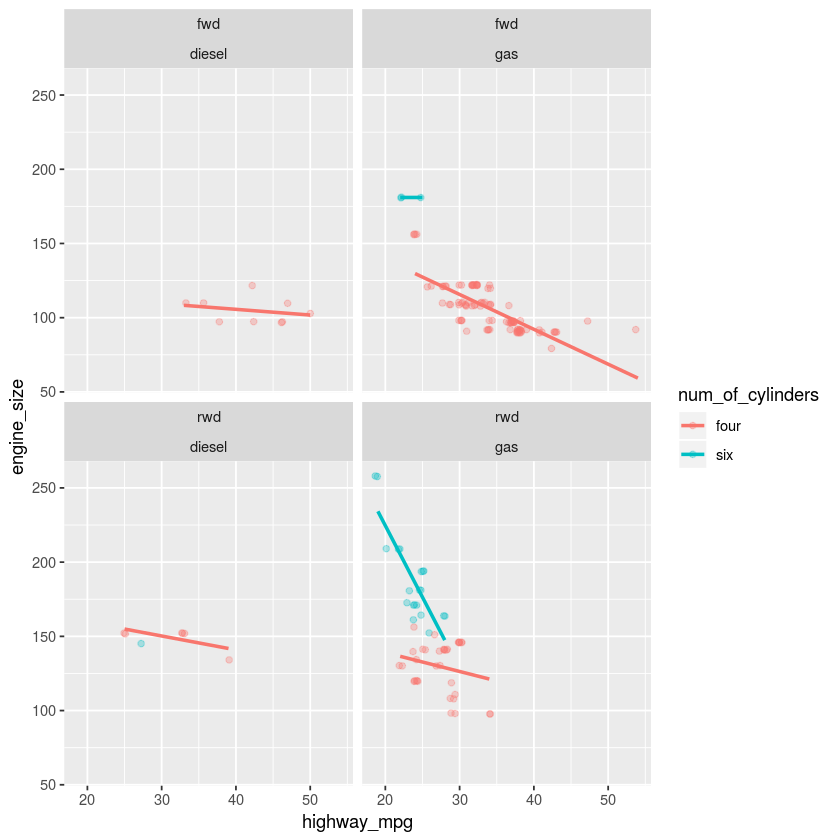

In [40]:
# Create highway mpg vs engine size plot
# include cylinders, drive wheels, and fuel type
# Add jitter, alpha and trend lines
df %>% 
   ggplot(aes(x = highway_mpg, y = engine_size, color = num_of_cylinders)) + 
   geom_jitter(alpha = 0.3) +
   geom_smooth(se = FALSE, method = "lm") +
   facet_wrap(drive_wheels ~ fuel_type)

Let's summarize the cleaning process we did in a single code block. This is an exercise in looking back at what you did earlier and recreating it below to reinforce your learning and to use this as a more concise code reference.

In [45]:
# Load libraries
library('forcats')# forcats
library('tidyverse')# tidyverse

# Load data
df_auto <- read_csv("auto.csv")

# Select columns of interest
df <- df_auto %>% 
   select(fuel_type, drive_wheels, 
          curb_weight, engine_type, 
          num_of_cylinders, engine_size, 
          fuel_system, horsepower, 
          city_mpg, highway_mpg)

# Filter rows as necessary
df <- df %>% 
   filter(num_of_cylinders %in% c("four", "six"), 
          drive_wheels != '4wd') %>% 
   mutate(num_of_cylinders = as.factor(num_of_cylinders),
        fuel_type = as.factor(fuel_type),
        drive_wheels = as.factor(drive_wheels),
        engine_type = as.factor(engine_type),
        fuel_system = as.factor(fuel_system),
        horsepower = as.integer(horsepower))


# Dropping levels wasn't required
# Drop all rows containing NAs
df <- df %>% drop_na() 

# Glimpse result
df %>% glimpse()

# Summary result
df %>% glimpse()

Parsed with column specification:
cols(
  .default = col_character(),
  symboling = col_integer(),
  wheel_base = col_double(),
  length = col_double(),
  width = col_double(),
  height = col_double(),
  curb_weight = col_integer(),
  engine_size = col_integer(),
  compression_ratio = col_double(),
  city_mpg = col_integer(),
  highway_mpg = col_integer()
)
See spec(...) for full column specifications.
Warning message:
“NAs introduced by coercion”

Observations: 174
Variables: 10
$ fuel_type        <fct> gas, gas, gas, gas, gas, gas, gas, gas, gas, gas, ga…
$ drive_wheels     <fct> rwd, rwd, rwd, fwd, rwd, rwd, rwd, rwd, rwd, rwd, rw…
$ curb_weight      <int> 2548, 2548, 2823, 2337, 2395, 2395, 2710, 2765, 3055…
$ engine_type      <fct> dohc, dohc, ohcv, ohc, ohc, ohc, ohc, ohc, ohc, ohc,…
$ num_of_cylinders <fct> four, four, six, four, four, four, six, six, six, si…
$ engine_size      <int> 130, 130, 152, 109, 108, 108, 164, 164, 164, 209, 20…
$ fuel_system      <fct> mpfi, mpfi, mpfi, mpfi, mpfi, mpfi, mpfi, mpfi, mpfi…
$ horsepower       <int> 111, 111, 154, 102, 101, 101, 121, 121, 121, 182, 18…
$ city_mpg         <int> 21, 21, 19, 24, 23, 23, 21, 21, 20, 16, 16, 15, 38, …
$ highway_mpg      <int> 27, 27, 26, 30, 29, 29, 28, 28, 25, 22, 22, 20, 43, …
Observations: 174
Variables: 10
$ fuel_type        <fct> gas, gas, gas, gas, gas, gas, gas, gas, gas, gas, ga…
$ drive_wheels     <fct> rwd, rwd, rwd, fwd, rwd, rwd, rwd, rwd, rw

Notice the same number of rows and columns and data types as before. Nicely done!